Hello Chana!

My name is Karina. Today I'm reviewing your project. 

Firstly, I'll only mark mistakes, if you have them. I'll give you oppotunity to fix it yourself. Of course, I'll add details if where are any difficulties.

Good luck!

Please respond to my comments and mark changes using color codes. 
Below you will find my comments - please do not change them.
You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here)

</div>

# What sells a car?

Here at Crankshaft List, hundreds of free advertisements for vehicles are published on our site every day. We need to study data collected from these advertisements over the last few years and determine which factors influence the price of a vehicle.

We will preprocess the data to address any issues with missing values, duplicates, data type, and perform exploratory data analysis to selectively slice the data.

This will allow us to analyze what factors impact the price of a car most. We will identify the most popular types of vehicles listed in the advertisements and study whether the price depends on age, mileage, condition, transmission type, and color. 


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice introduction)

## Initialization

In [598]:
# Loading all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load data

In [599]:
# Loading the data file into a DataFrame

try:
    data = pd.read_csv('/vehicles_us.csv.')
except:
    data = pd.read_csv('/datasets/vehicles_us.csv')

### Explore initial data

The dataset contains the following fields:

- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission'
- `type'
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [600]:
# printing the general/summary information about the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


There are 13 columns and 51525 rows in the dataframe.
The data contains 51525 ads with data on 12 variables.

In [601]:
# printing a sample of data

data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [602]:
#Checking for missing value counts per column

data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

An initial review of the data allows us to already identify some issues with the data:
There are missing values in several columns and columns with inappropriate data types.

There are several columns with inappropriate data types. The columns 'model_year', 'cylinders', 'odometer' and 'is_4wd' are float types, yet they should be integers. Also, 'date_posted' is a string, yet it should be a datetime type. Also, the 'condition' column is a string variable which should be converted to an integer based on a categorical scale to enable further analysis. 

There are missing values in the 'model_year', 'cylinders', 'odometer', paint_color', and 'is_4wd' columns. More than half of the data in 'is_4wd' has missing values.

### Conclusions and further steps

We need to convert several columns to new data types. But first, we need to address the missing values in some of these columns.

One column stands out in particular. The majority of the values in 'is_4wd' are missing. This may have been the result of a technical or programming error. Since the data in this column is similar to a Boolean value, where 1.0 is true if there is four-wheel drive and 0.0 is false if there is no four-wheel drive, it is possible that the missing values in that column represent 0.0 values. We will, therefore, replace the NaN values with 0.

We will then calculate the percentage of missing values in each of the columns with missing values to help us determine how to fill the missing values. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great notes) Everything is correct here)

## Treat missing values (if any)

In [603]:
# Replacing the missing values in 'is_4wd' with 0.

data['is_4wd']= data['is_4wd'].fillna(0)

In [604]:
# Checking that missing values are filled in for 'is_4wd'.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


The missing values in 'is_4wd' have been filled in. Now let's calculate the percentage of missing values in the remaining columns.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct replacement)

In [605]:
# Checking percentage of missing values in each column

data.isnull().sum()/len(data)

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.000000
date_posted     0.000000
days_listed     0.000000
dtype: float64

There are 7% missing values in 'model_year', 10% missing in 'cylinders', 15% in 'odometer', and 18% in 'paint_color'. Let's examine if there is a relationship between the missing values in these columns. We will slice the dataframe to create a slice with only missing values so we can see if the rows where there are missing values in these columns overlap one another. We will also check the distribution in the missing values data sample compared to the distribution of the entire data sample.

In [606]:
#Slicing the data to create a sample containing all missing values.

data_missing = data[data.model_year.isna() | data.cylinders.isna() | data.odometer.isna() | data.paint_color.isna()]
print(data_missing)


       price  model_year                    model  condition  cylinders fuel  \
0       9400      2011.0                   bmw x5       good        6.0  gas   
1      25500         NaN               ford f-150       good        6.0  gas   
3       1500      2003.0               ford f-150       fair        8.0  gas   
8      11500      2012.0              kia sorento  excellent        4.0  gas   
9       9200      2008.0              honda pilot  excellent        NaN  gas   
...      ...         ...                      ...        ...        ...  ...   
51507  29500      2012.0            toyota tundra       good        8.0  gas   
51508   4950         NaN  chrysler town & country  excellent        6.0  gas   
51516   8999      2011.0      jeep grand cherokee       good        6.0  gas   
51519  11750      2015.0             honda accord  excellent        4.0  gas   
51524   6300      2014.0            nissan altima       good        4.0  gas   

       odometer transmission      type 

There are 21609 rows containing missing values. There is no clear relationship among the columns with missing values. Some rows contain missing values in more than one column, others have missing values in only one column.
If we drop the rows with missing values, we will lose around 42% of the data.
There are many possible reasons for missing values in the data. Some reasons for the missing values might be: Seller forgot to fill in a field. There might have been a technical or programming error.


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I really like your notes here!

We need to fill in the missing values in 'paint_color' since the rows with missing values represent 18% of the data. Let's check the distribution of 'paint_color' to see the range of colors.

In [607]:
# Comparing the percentages of 'paint_color' values in the sample with missing values and the entire data

print(data_missing['paint_color'].sort_values().value_counts(normalize=True, ascending=False))
print()
print(data['paint_color'].sort_values().value_counts(normalize=True, ascending=False))

white     0.234079
black     0.183115
silver    0.148760
grey      0.119430
blue      0.107195
red       0.100632
green     0.036137
brown     0.030060
custom    0.026576
yellow    0.005915
orange    0.005591
purple    0.002512
Name: paint_color, dtype: float64

white     0.237328
black     0.182025
silver    0.147759
grey      0.119196
blue      0.105897
red       0.104619
green     0.033035
brown     0.028941
custom    0.027285
yellow    0.006034
orange    0.005466
purple    0.002414
Name: paint_color, dtype: float64


The distribution of paint colors in the missing_data and data samples are similar. The most popular colors in each sample are white, black, silver, and grey. If we fill in the missing values for paint color with one paint color, we will skew the data. 

The missing values in 'paint_color' cannot be filled in accurately based on the data in the other columns. There is no way of knowing the paint color of a vehicle based on 'model' or 'condition'.

Therefore, we will replace the missing value with 'unknown'. 

In [608]:
# Filling in missing values in 'paint_color' with 'unknown'.

data['paint_color']= data['paint_color'].fillna('unknown')

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Filling by 'unknown' is the best idea here) 

Now that we have filled in the categorical variable 'paint_color', let's fill in the missing values in 'cylinders', 'model_year' and 'odometer' with the mean or median for each variable taken per group from a relevant category.

The most relevant category to obtain a median number of cylinders from is the 'model' vehicle. Let's fill in the missing values in cylinder using the median of 'cylinders' for each 'model' vehicle.

In [609]:
# Filling in missing values in 'cylinders' with the median per 'model'

cols = ['model','cylinders']
data['cylinders'] = data[cols].groupby('model').transform(lambda x: x.fillna(x.median()))
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Here I recommend you to fill missed values by median, counted for each model. So, it's possible to use groupby() by model column and 'median' as an aggregation function. 
    
As we're talking about vehicles, it'll save the original cylinders count for each vehicle type) 
    
And it'll save the original distribution as well)

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I fixed this. Thank you! :) 

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1.</b> <a class="tocSkip"></a>

Correct now)

In [610]:
# Checking that missing values are filled in for 'cylinders'.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


The missing values of 'cylinders' are filled in.

In order to fill in the missing data in 'odometer' and 'model_year', we will need to use a mean of the existing data.

We can use the 'condition' column to find means based on condition so that we can fill in the missing values in 'odometer' and 'model_year' with more accurate means.

Let's categorize the 'condition' column using a numeric scale to enable further analysis.

In [611]:
#Reviewing the percentages of values in 'condition'

data['condition'].sort_values().value_counts(normalize=True, ascending=False)

excellent    0.480796
good         0.390975
like new     0.092033
fair         0.031189
new          0.002775
salvage      0.002232
Name: condition, dtype: float64

There are six values in 'condition' ranging from new to salvage. We will rank these string values and assign each value to a numerical value, ranging from 0-5, based on the condition, with 0 being worst and 5 being best.

In [612]:
# Replacing string values with numeric scale in condition

data['condition'] = data['condition'].replace(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'],['5', '4', '3', '2', '1', '0'])


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great usage of replace()

In [613]:
#Checking to make sure condition column string values have been replaced by numeric scale

data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,NaN,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,1,8.0,gas,NaN,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


Now that we replaced the categorical values with a numeric scale in 'condition', we can use it to fill in them missing values for 'model_year' based on the means or medians per condition rank of the vehicle. 
Let's check the medians for 'model_year' based on condition rank to see if these can be used to fill in the missing values in 'model_year'.

In [614]:
# Checking medians for 'model_year' based on 'condition'

data['model_year']. groupby(data['condition']).median()

condition
0    2005.0
1    2003.0
2    2009.0
3    2012.0
4    2014.0
5    2018.0
Name: model_year, dtype: float64

There is a surprising mean for condition rank 1. The value of 1 is fair and the value of 0 is salvage. We might have expected that the median model year for a car ranked as salvage would be older than for a car ranked as fair, since a conditon rank of 0 is worse than 1.

Yet, it makes sense that the median model year for a car ranked as salvage could be more recent than a car marked as fair since a car that is considered a salvage does not indicate it is an old car. It may have been driven very little but have been in a car accident so it is considered salvage, which means a "total loss" for an auto insurance company.

Other than condition 0, the median model years for conditions 2-5 are in order of increasing model years so that the better the condition of the car, the younger the car. This is what we would expect so we will fill in the missing values in model year using the medians of model year grouped by condition rank.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I agree with your notes)

In [615]:
# Using median of 'model_year' grouped by 'condition' to replace missing values in 'model_year'

cols = ['condition','model_year']
data['model_year_new'] = data[cols].groupby('condition').transform(lambda x: x.fillna(x.median()))
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_new
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,2011.0
1,25500,NaN,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2009.0
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2013.0
3,1500,2003.0,ford f-150,1,8.0,gas,NaN,automatic,pickup,unknown,0.0,2019-03-22,9,2003.0
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2017.0


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

It's also possible to replace years by median of 'model'

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Thanks for the tip! I thought that model_year would be more closely related to 'condition'.

</div>

Let's replace model_year with the model_year_new values.

In [616]:
# Replacing model_year with the values of model_year_new.

data['model_year'] = data['model_year_new']
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_new
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,2011.0
1,25500,2009.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2009.0
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2013.0
3,1500,2003.0,ford f-150,1,8.0,gas,NaN,automatic,pickup,unknown,0.0,2019-03-22,9,2003.0
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2017.0


Now that we filled in the missing values in 'model_year', let's check if we can fill in the missing values in 'odometer' with the means of 'odometer' grouped by 'model_year'.

In [617]:
# Calculating the vehicle's average mileage per year

data['odometer'].groupby(data['model_year']).mean()

model_year
1908.0    169328.000000
1929.0              NaN
1936.0     30000.000000
1948.0      4000.000000
1949.0      1800.000000
              ...      
2015.0     82501.745817
2016.0     61455.480876
2017.0     47557.926471
2018.0     25463.388740
2019.0     17076.810976
Name: odometer, Length: 68, dtype: float64

It looks like we cannot use the means of 'model_year' to fill in all of the missing values in 'model_year' because at least in 1929 there is a missing value so we cannot obtain a mean for 1929 with which to replace the missing value in odometer.

Let's proceed and fill in the missing values in 'odometer' using the means of 'odometer' grouped by 'model_year' and then check how many missing values in 'odometer' remain. 

In [618]:
# Filling in missing values in 'odometer' using means of 'odometer' grouped by 'model_year'

cols = ['model_year','odometer']
data['odometer_new'] = data[cols].groupby('model_year').transform(lambda x: x.fillna(x.mean()))
data.isna().sum()

price                0
model_year           0
model                0
condition            0
cylinders            0
fuel                 0
odometer          7892
transmission         0
type                 0
paint_color          0
is_4wd               0
date_posted          0
days_listed          0
model_year_new       0
odometer_new         1
dtype: int64

There is only one remaining missing value in odometer_new and we know the year is 1929, so we will drop the row containing that missing value after we fill in all other missing values.

Let's replace 'odometer' with 'odometer_new' to fill in the missing values.

In [619]:
# Replacing 'odometer' with the values of 'odometer_new'.

data['odometer'] = data['odometer_new']

In [620]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           51525 non-null  int64  
 1   model_year      51525 non-null  float64
 2   model           51525 non-null  object 
 3   condition       51525 non-null  object 
 4   cylinders       51525 non-null  float64
 5   fuel            51525 non-null  object 
 6   odometer        51524 non-null  float64
 7   transmission    51525 non-null  object 
 8   type            51525 non-null  object 
 9   paint_color     51525 non-null  object 
 10  is_4wd          51525 non-null  float64
 11  date_posted     51525 non-null  object 
 12  days_listed     51525 non-null  int64  
 13  model_year_new  51525 non-null  float64
 14  odometer_new    51524 non-null  float64
dtypes: float64(6), int64(2), object(7)
memory usage: 5.9+ MB


In [621]:
# Dropping the one row with a missing value in 'odometer'

data.dropna(how='any', inplace= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           51524 non-null  int64  
 1   model_year      51524 non-null  float64
 2   model           51524 non-null  object 
 3   condition       51524 non-null  object 
 4   cylinders       51524 non-null  float64
 5   fuel            51524 non-null  object 
 6   odometer        51524 non-null  float64
 7   transmission    51524 non-null  object 
 8   type            51524 non-null  object 
 9   paint_color     51524 non-null  object 
 10  is_4wd          51524 non-null  float64
 11  date_posted     51524 non-null  object 
 12  days_listed     51524 non-null  int64  
 13  model_year_new  51524 non-null  float64
 14  odometer_new    51524 non-null  float64
dtypes: float64(6), int64(2), object(7)
memory usage: 6.3+ MB


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Pretty good part)

## Fix data types

Now that the data is more or less complete, we need to fix the data types. After filling in the missing values, some of the columns became object types. We need to convert these to a numeric type first.

Let's convert the columns 'model_year', 'condition','cylinders', 'odometer', and 'is_4wd' into integer types. 

In [622]:
# Converting columns from float to integer type

data['model_year'] = data['model_year'].astype(int)
data['condition'] = data['condition'].astype(int)
data['cylinders'] = data['cylinders'].astype(int)
data['odometer'] = data['odometer'].astype(int)
data['is_4wd'] = data['is_4wd'].astype(int)


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct)

In [623]:
# Checking that data types were converted to integers

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           51524 non-null  int64  
 1   model_year      51524 non-null  int64  
 2   model           51524 non-null  object 
 3   condition       51524 non-null  int64  
 4   cylinders       51524 non-null  int64  
 5   fuel            51524 non-null  object 
 6   odometer        51524 non-null  int64  
 7   transmission    51524 non-null  object 
 8   type            51524 non-null  object 
 9   paint_color     51524 non-null  object 
 10  is_4wd          51524 non-null  int64  
 11  date_posted     51524 non-null  object 
 12  days_listed     51524 non-null  int64  
 13  model_year_new  51524 non-null  float64
 14  odometer_new    51524 non-null  float64
dtypes: float64(2), int64(7), object(6)
memory usage: 6.3+ MB


Now that the data is complete, let's check for duplicates in the data.

In [624]:
# Checking for duplicates in the data

data.duplicated().sum()

0

## Enrich data

We will need to use 'date_posted' to calculate the age of the ad.
Let's convert 'date_posted' to a datetime type for further analysis. 

In [625]:
# Converting 'date_posted' to a datetime value

data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')

In [626]:
# Checking that datetime value was assigned to 'date_posted'

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51524 non-null  int64         
 1   model_year      51524 non-null  int64         
 2   model           51524 non-null  object        
 3   condition       51524 non-null  int64         
 4   cylinders       51524 non-null  int64         
 5   fuel            51524 non-null  object        
 6   odometer        51524 non-null  int64         
 7   transmission    51524 non-null  object        
 8   type            51524 non-null  object        
 9   paint_color     51524 non-null  object        
 10  is_4wd          51524 non-null  int64         
 11  date_posted     51524 non-null  datetime64[ns]
 12  days_listed     51524 non-null  int64         
 13  model_year_new  51524 non-null  float64       
 14  odometer_new    51524 non-null  float64       
dtypes:

We need to calculate the vehicle's age when the ad was placed. We will extract the year from 'date_posted' and assign it to a new column 'year_posted'.

In [627]:
# Extracting the year from 'date_posted'

data['year_posted'] = pd.DatetimeIndex(data['date_posted']).year

data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_new,odometer_new,year_posted
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,2011.0,145000.000000,2018
1,25500,2009,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2009.0,88705.000000,2018
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2013.0,110000.000000,2019
3,1500,2003,ford f-150,1,8,gas,163440,automatic,pickup,unknown,0,2019-03-22,9,2003.0,163440.501893,2019
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2017.0,80903.000000,2019


Let's create a function to subtract the model_year from the year_posted.

In [628]:
# Creating a function to calculate vehicle age

def age(year_posted, model_year):
    for year in year_posted:
        data['age'] = data['year_posted'] - data['model_year'] + 1

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Some good advice: add +1 into age calculations. Some companies calculate extra months as a year. This will also help to avoid nulls.
    
</div> 

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Have you counted it later?

    The vehicle's average mileage per year
    
if not, please, add it here, we'll need to study it later)

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I included vehicle's average mileage per year above - see my comment above in blue.
I see that I should have used this calculation to study the core parameters later, not only to use when filling in the missing values. I will save this calculation to a new column below. Thank you!
    
 I also added +1 to the function for age.

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1.</b> <a class="tocSkip"></a>

Thanks for your answer)

In [629]:
# Applying the age function to create a new column 'age'

age(data['year_posted'], data['model_year'])

In [630]:
# Checking the age function worked and created a new column 'age'

data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_new,odometer_new,year_posted,age
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,2011.0,145000.000000,2018,8
1,25500,2009,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2009.0,88705.000000,2018,10
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2013.0,110000.000000,2019,7
3,1500,2003,ford f-150,1,8,gas,163440,automatic,pickup,unknown,0,2019-03-22,9,2003.0,163440.501893,2019,17
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2017.0,80903.000000,2019,3


We will need to use the average mileage per year to calculate correlations. Let's create a column assigning the average mileage per year to each ad listing.

In [631]:
# Creating new column with the average mileage per year per ad

data['avg_mileage'] = data['odometer'].fillna(data.groupby('odometer')['model_year'].transform('mean'))

data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_new,odometer_new,year_posted,age,avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,2011.0,145000.000000,2018,8,145000
1,25500,2009,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2009.0,88705.000000,2018,10,88705
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2013.0,110000.000000,2019,7,110000
3,1500,2003,ford f-150,1,8,gas,163440,automatic,pickup,unknown,0,2019-03-22,9,2003.0,163440.501893,2019,17,163440
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2017.0,80903.000000,2019,3,80903


## Check clean data

We will need the average mileage per vehicle to study the mileage parameter and determine it's correlation with the price. Let's save the average mileage per vehicle to a new column.

[Given the data is ready for the analysis, take just another quick look at it. It is helpful to see what exactly you are going to use for the analysis.]

Now that the data has been preprocessed, let's take another overview of it.

In [632]:
# print the general/summary information about the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51524 non-null  int64         
 1   model_year      51524 non-null  int64         
 2   model           51524 non-null  object        
 3   condition       51524 non-null  int64         
 4   cylinders       51524 non-null  int64         
 5   fuel            51524 non-null  object        
 6   odometer        51524 non-null  int64         
 7   transmission    51524 non-null  object        
 8   type            51524 non-null  object        
 9   paint_color     51524 non-null  object        
 10  is_4wd          51524 non-null  int64         
 11  date_posted     51524 non-null  datetime64[ns]
 12  days_listed     51524 non-null  int64         
 13  model_year_new  51524 non-null  float64       
 14  odometer_new    51524 non-null  float64       
 15  ye

In [633]:
# print a sample of data

data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_new,odometer_new,year_posted,age,avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,2011.0,145000.000000,2018,8,145000
1,25500,2009,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2009.0,88705.000000,2018,10,88705
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2013.0,110000.000000,2019,7,110000
3,1500,2003,ford f-150,1,8,gas,163440,automatic,pickup,unknown,0,2019-03-22,9,2003.0,163440.501893,2019,17,163440
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2017.0,80903.000000,2019,3,80903


## Study core parameters

Now that our data is preprocessed, we can explore our parameters.

The parameters we will explore are:
- Condition
- The vehicle's age when the ad was placed
- Number of cylinders
- Mileage
- Price

Let's create a function to automate the plotting of histograms to explore these parameters.

In [634]:
# Creating a function to plot histograms

def hist_plot(data, column):
        fig, ax = plt.subplots(1, 1)
        ax.hist(data[column], bins=100)
        ax.set_title(column)
        ax.set_xlabel(column)
        ax.set_ylabel('frequency')
        plt.show()

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I changed the bins parameter to 100 for the function so it will be easiert to see the distribution, as in the distribution of price below (where you commented).

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1.</b> <a class="tocSkip"></a>

Age hist looks really good now)

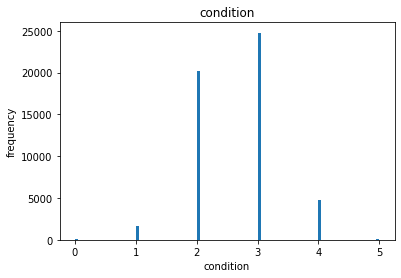

In [635]:
# Plotting the distribution of 'condition'

hist_plot(data, 'condition')

In [636]:
# Checking the number of ads for each 'condition'

data['condition'].value_counts(normalize=True)

3    0.480805
2    0.390963
4    0.092035
1    0.031189
5    0.002775
0    0.002232
Name: condition, dtype: float64

The majority of vehicles are within the condition of 3 (excellent, 48%) and 2 (good, 39%), with very few ranked as 5 (new, 0.3%) or 0 (salvage, 0.2%)

Let's explore the vehicle's age when the ad was posted using the 'age' parameter.

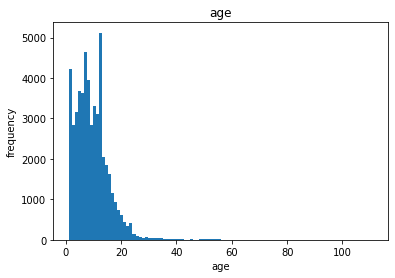

In [637]:
# Plotting the distribution of 'age'

hist_plot(data, 'age')

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great usage of functions)

A majority of vehicles were in the lower age range of 0-10 years. Yet there are outliers that are significantly older.
Let's examine the statistics to get a clarify the range.

In [638]:
# Checking the distribution of age of vehicle using value counts

data['age'].describe()

count    51524.000000
mean         9.489481
std          6.095366
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max        111.000000
Name: age, dtype: float64

The distibution of ages of vehicle has a range of 67 different age values from 0 to 110. The median is 7.0 but the mean is 8.5. There are significantly higher values skewing the distribution and raising the mean.
Let's take a closer look at the distribution using a boxplot.

<AxesSubplot:>

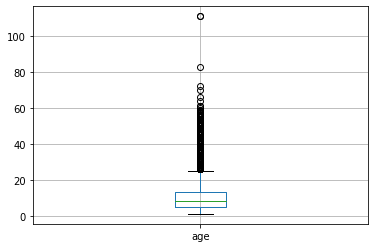

In [639]:
data.boxplot(column='age')

Let's slice the data at the Q3 level to examine the higher ages more closely.

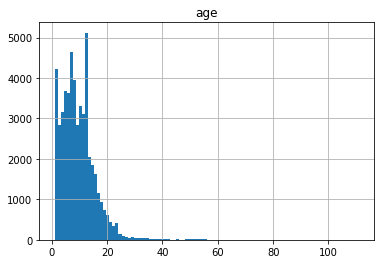

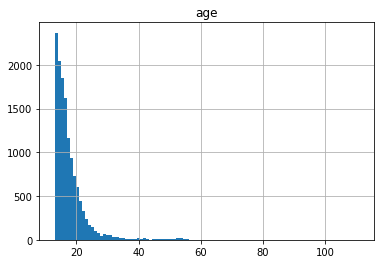

In [640]:
# Checking data with ages above 12

high_odometer_data = data.query('age > 12')

data.hist('age', bins=100)
plt.show()

high_odometer_data.hist('age', bins=100)
plt.show()

The distribution of ages above Q3 looks like the normal higher end distribution of a bell curve. The data has a wide range but the majority of the ages looks consistent with what we would expect. The median age is 7. The higher values for age looks like a normal feature of the data. We would expect older vehicles to be listed on a user car website.
Let's check the value count for the 10 most common ages in the data.

<AxesSubplot:>

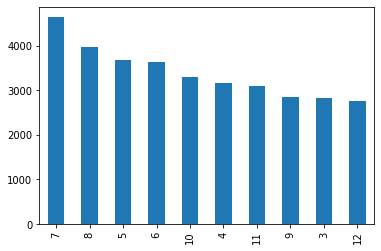

In [641]:
# Plotting 10 most common ages of vehicles in the data

data['age'].value_counts().head(10).plot.bar(x='age')

The top ten ages of vehicles range from 2-11 years. This makes sense since 87% of vehicles were listed as in "good" or "excellent" condition. We would have expected the cars to be between mostly 5-10 years in age. 

Let's check the distribution of 'cylinders'. Cylinders is categorical data so we will use a bar chart to display the distribution

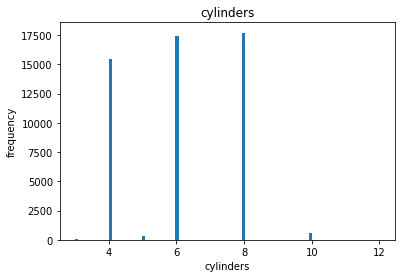

In [642]:
# Plotting the distribution of 'cylinders'

hist_plot(data, 'cylinders')

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I'm sure this plot will change after changing the 1.2 part, please, don't forget to check it)

In [643]:
# Checking the distribution of 'cylinders' using describe

data['cylinders'].describe()

count    51524.000000
mean         6.121031
std          1.657452
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [644]:
# Checking the distribution of 'cylinders'

data['cylinders'].value_counts(normalize=True)

8     0.343743
6     0.338386
4     0.300811
10    0.010655
5     0.005706
3     0.000660
12    0.000039
Name: cylinders, dtype: float64

The number of cylinders range from 3-12. The median is 6 and the mean is 6.1. The distribution looks normal. The majority of vehicles have 8 (34%), 6 (34%), or 4 (30%) cylinders.

Let's check the distribution for 'avg_mileage' values. Since 'avg_mileage' is a quantitative parameter, we will use a histogram and a boxplot.

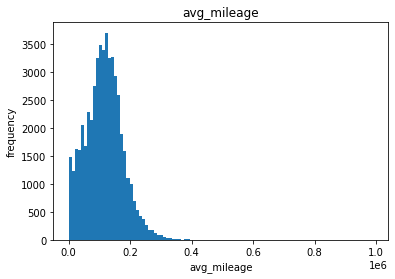

In [645]:
# Plotting the distribution of 'avg_mileage'

hist_plot(data, 'avg_mileage')

There is a high number of vehicles with low mileage readings. This is surprising for a used car website, especially when the majority of vehicles are listed in 'good' to 'excellent' but not 'new' condition. Let's check the distribution of 'avg_mileage' for outliers using describe() and a boxplot.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Here it's better to study not odometer, but 'The vehicle's average mileage per year'

In [646]:
data['avg_mileage'].describe()

count     51524.000000
mean     115557.311855
std       61875.413509
min           0.000000
25%       73597.000000
50%      113896.000000
75%      151881.000000
max      990000.000000
Name: avg_mileage, dtype: float64

<AxesSubplot:>

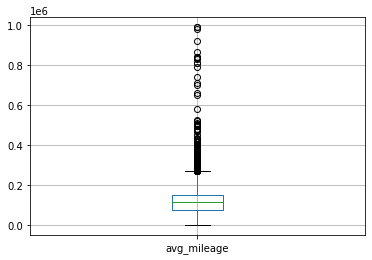

In [517]:
# Exploring the distribution of 'avg_mileage' with a boxplot

data.boxplot(column='avg_mileage')

The majority of vehicles have a relatively low mileage. This is surprising for used cars that mostly described as 'excellent' or 'good' condition. But there are still many vehicles with mileages above the Q3 level that must be skewing the mean to the higher end.  
Let's explore the data at the two extremes.
We will slice the data above the Q3 level and below the Q1 level.

Let's slice the vehicles with high mileage above the Q3 level to compare the distribution of these vehicles with the entire data.

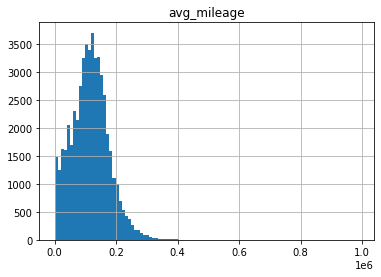

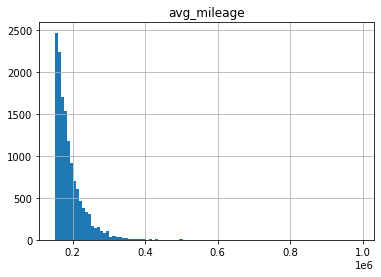

In [518]:
# Checking data with 'avg_mileage' value above 150000

high_odometer_data = data.query('avg_mileage > 150000')

data.hist('avg_mileage', bins=100)
plt.show()

high_odometer_data.hist('avg_mileage', bins=100)
plt.show()

We will look at the value counts to investigate where the high counts in the high odometer levels are coming from.

In [519]:
# Checking value counts for high_odometer_databases

high_odometer_data['avg_mileage'].value_counts().head(20)

151881    323
151854    318
158872    244
163440    231
160000    167
200000    166
158508    162
180000    161
170000    146
174683    132
176735    130
185000    110
152000    106
190000    106
165000    100
157000     94
156000     86
154000     85
175000     84
168000     82
Name: avg_mileage, dtype: int64

The distribution of odometer values above the Q3 level seems like a normal distribution. It looks like the reason these values ended up above Q3 is because something is unusual about the values below Q1 that must be skewing the mean and the median to the lower end.

Let's slice the vehicles with low mileage below the Q1 level to compare the distribution of these vehicles with the entire data.

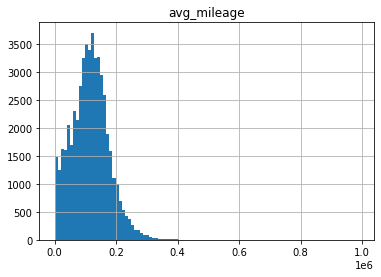

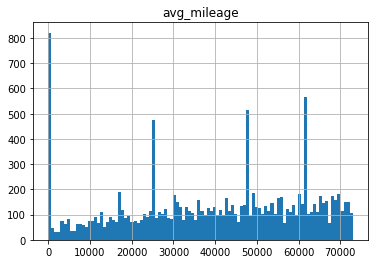

In [520]:
# Checking data with odometer value below 73000

low_odometer_data = data.query('avg_mileage < 73000')

data.hist('avg_mileage', bins=100)
plt.show()
low_odometer_data.hist('avg_mileage', bins=100)
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1.</b> <a class="tocSkip"></a>

Great study of mileage)

There are mostly higher values within the low_odometer_data, yet there are four spikes of unusually popular odometer levels below the 25% level. Let's explore this data slice of low odometer levels to understand these spikes.
We will look at the value counts to investigate where the high counts are coming from.

In [521]:
low_odometer_data['avg_mileage'].value_counts().head(20)

61455    444
47557    379
25463    338
0        185
70000     72
49000     71
59000     63
55000     63
68000     61
50000     60
64000     59
65000     58
71000     55
69000     54
60000     54
17076     52
52000     51
38000     49
72000     49
62000     48
Name: avg_mileage, dtype: int64

There are 13,208 vehicles with odometer readings below 75,000. Most of the the odometer readings are rounded off to the nearest thousand and there are a less than 100 ads with that value. It is surprising that the top four most common odometer readings are: 61455, 47557, 25463, and 0. The top three readings are very specific readings and there is a low probability that these odometer readings were genuinely the most common in the ads. It is possible that these odomoter values were generated by a technical error or a programming error.
Let's group odometer by condition for low_odometer_data to see if the values make sense.

In [522]:
low_odometer_data.groupby('condition')['avg_mileage'].value_counts()

condition  avg_mileage
0          0              2
           9621           2
           29328          2
           38000          2
           60925          2
                         ..
5          52975          1
           58000          1
           69000          1
           69500          1
           70000          1
Name: avg_mileage, Length: 5295, dtype: int64

There are only two vehicles listed as "new" (condition rank 1) with a 0 value. That means the remaining 183 values of 0 are inaccurate. A car listed as something other than "new" cannot have 0 mileage.

Let's check what percentage of the data the 0 values and the other top 3 values in low_odometer_data represent.

In [523]:
# Checking the percentage of the low odometer data outliers data in low_odometer_data

low_odometer_data['avg_mileage'].value_counts().head(4).sum()/len(low_odometer_data)

0.10607612893056978

These peculiar odometer values represent 10% of the low_odometer_data.

In [524]:
# Checking the percentage of the low odometer data outliers data in the entire data

low_odometer_data['avg_mileage'].value_counts().head(4).sum()/len(data)

0.026123748156199052

The peculiar odometer values represent 2.6% of the entire data.
We will, therefore, exclude these values from further analysis by slicing the data above the Q1 level.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I really like your researches)

Let's explore the 'price' parameter using a histogram and a boxplot.

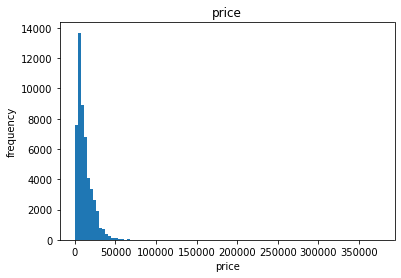

In [525]:
# Plotting the price distribution

hist_plot(data, 'price')

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Better to use more bins for this column, it's unreal to make conclusions from this hist

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1.</b> <a class="tocSkip"></a>

really good now)

The price distribution is skewed to the low end and there are several high spikes that stand out in the low end of the data. Let's explore these more using a boxplot.

<AxesSubplot:>

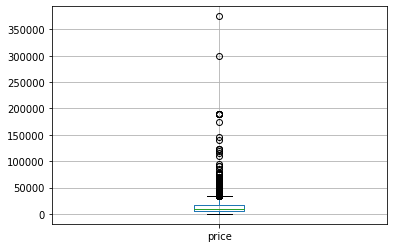

In [526]:
# Exploring the distribution of 'price' with a boxplot

data.boxplot(column='price')

The whiskers are very asymmetrical. The median of 'price' is surprisingly low, near zero. At the other end, there are many outliers on the higher end of the price distribution. Let's explore these two extremes more closely.

In [527]:
# Checking distribution of 'price'

data['price'].describe()

count     51524.00000
mean      12132.35104
std       10040.86718
min           1.00000
25%        5000.00000
50%        9000.00000
75%       16836.00000
max      375000.00000
Name: price, dtype: float64

There is a wide range of price (1-375000.) The median price is 9000, the mean is 12132, and the standard deviation is 10040, so there are high priced outliers skewing the distribution to the high end. 

Let's slice the vehicles with high prices above the Q3 level to compare the distribution of these vehicles with the entire data.

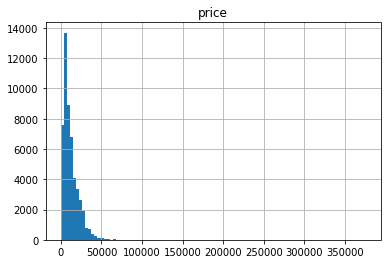

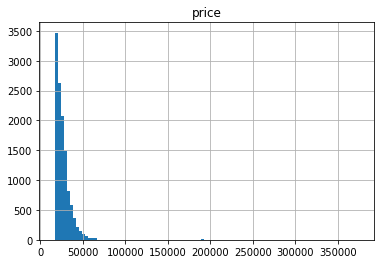

In [528]:
# Checking data with price values above 17000

high_price_data = data.query('price > 17000')

data.hist('price', bins=100)
plt.show()

high_price_data.hist('price', bins=100)
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

This bins count is much better)

The distribution of prices above the Q3 level seems like a normal distribution. It looks like the reason these values ended up above Q3 is because something is unusual about the values below Q1 that must be skewing the mean and the median to the lower end.

Let's slice the vehicles with low mileage below the Q1 level to compare the distribution of these vehicles with the entire data.

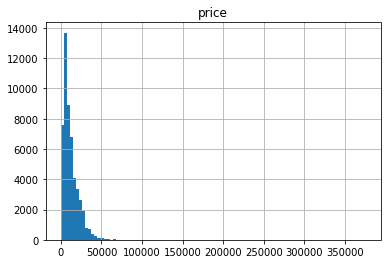

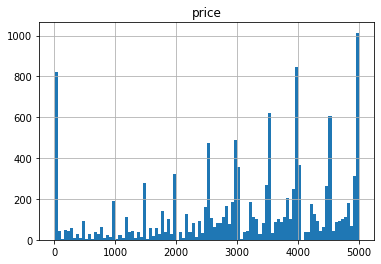

In [529]:
# Checking data with prices below 5000

low_price_data = data.query('price < 5000')

data.hist('price', bins=100)
plt.show()
low_price_data.hist('price', bins=100)
plt.show()

There is an overall upwards trend within the low_price_data, yet there are ten spikes of unusually high prices below the 25% level. Let's explore this data slice of low odometer levels to understand these spikes.
We will look at the value counts to investigate where the high counts for these prices are coming from.

In [530]:
low_price_data['price'].value_counts().head(15)

1       798
4995    624
3500    620
4500    608
3995    512
2500    476
4000    364
3000    357
4900    304
2995    277
1500    247
3900    243
2000    216
3800    203
2900    186
Name: price, dtype: int64

The spikes mostly represent values that seem reasonable for used car prices. There is, however, a surprisingly high value of cars priced at 1. This seems like an inaccuracy due to a technical or processing error.
Let's graph prices by condition for low_price_data to explore these values further.

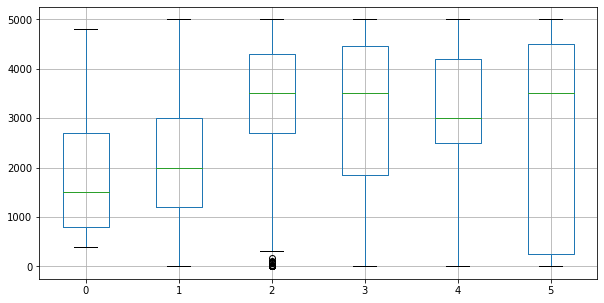

In [531]:
# Plotting low_price_data prices by condition

low_price_data.pivot(values='price', columns='condition').boxplot(figsize=(10,5))
plt.show()

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Also possible to use boxplots in such cases, condition is a categorical variable  here)
    
And it will possibly be easier to make conclusions)

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1.</b> <a class="tocSkip"></a>

More informative)

There are prices are abnormally distributed based on condition. We would have expected to find higher prices at the condition level 5 ("new") and lower prices at condition level of 0 ("salvage"). Yet, there are low and high values throughout both of these columns. There are surprisingly low levels in the "new" column, such as values near 0. The data in low_price_data is therefore faulty and we need to exclude it from further analysis.
Let's check the percentage of the low_price_data in the entire data.

In [532]:
# Checking the percentage of the low_price_data outliers data in the entire data

len(low_price_data)/len(data)

0.2490878037419455

The data in low_price_data represents almost 25% of the data. This is a significant amount of data, but since it contains outliers that seem to be skewing the data, we need to slice the data to exclude data below the Q1 level for further analysis.


## Study and treat outliers

The 'avg_mileage' and 'price' contain outliers that skew their distributions. We will therefore slice the data to exclude these outliers before we conduct further analysis.

There are abnormal avg_mileage values below the Q1 level in the avg_mileage distribution and they represent 2.6% of the entire data.
We will, therefore, exclude these values from further analysis by slicing the data above the Q1 level.

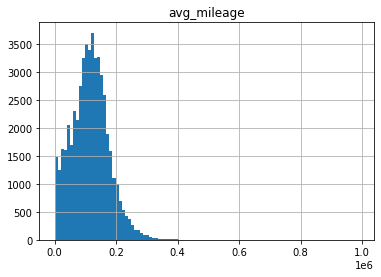

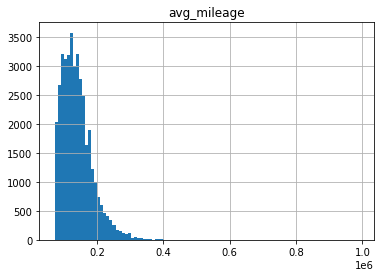

In [647]:
# Slicing the 'avg_mileage' data above the Q1 level of 73000

new_odometer_data = data.query('avg_mileage > 73000')

data.hist('avg_mileage', bins=100)
plt.show()
new_odometer_data.hist('avg_mileage', bins=100)
plt.show()

The 'price' data is also skewed by outliers below the Q1 level. Even though this data represents 25% of the data, we need to to exclude these outliers by slicing the data above the Q1 level for further analysis.

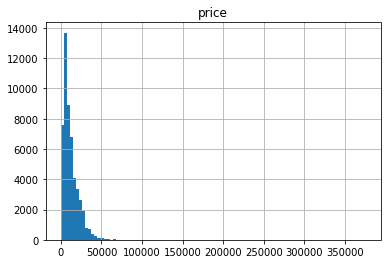

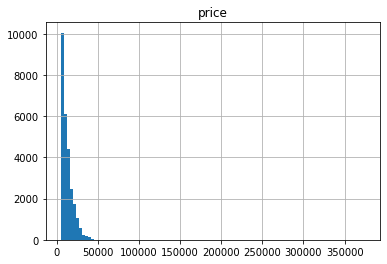

In [534]:
# Slicing the 'price' data above the Q1 level of 5000 using the new_odometer_data

new_price_data = new_odometer_data.query('price > 5000')

data.hist('price', bins=100)
plt.show()
new_price_data.hist('price', bins=100)
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Pretty good part)

## Study core parameters without outliers

Let's compare the distributions in the newly created data compared to the original data that included outliers.

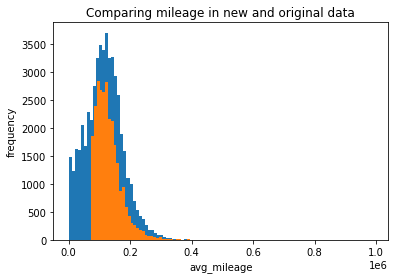

In [648]:
# Plotting new and old data for avg_mileage to check distribution

fig, ax = plt.subplots(1, 1)
ax.hist(data['avg_mileage'], bins=100)
ax.hist(new_price_data['avg_mileage'], bins=100)
ax.set_title('Comparing mileage in new and original data')
ax.set_xlabel('avg_mileage')
ax.set_ylabel('frequency')
plt.show()

Let's explore the distributions of 'price' in the newly created data compared to the original data.

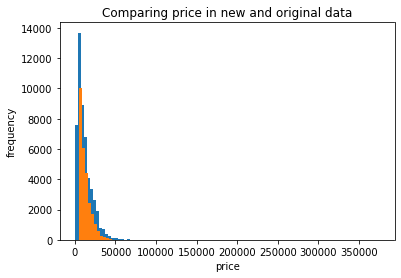

In [536]:
# Plotting new and old data for price to check distribution

fig, ax = plt.subplots(1, 1)
ax.hist(data['price'], bins=100)
ax.hist(new_price_data['price'], bins=100)
ax.set_title('Comparing price in new and original data')
ax.set_xlabel('price')
ax.set_ylabel('frequency')
plt.show()

The distribution of new_price_data has less outliers which will enable more accurate further analysis.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Please, don't forget to add titles ans axises names for each plot) 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1.</b> <a class="tocSkip"></a>

Great corrections)

## Ads lifetime

Let's explore how many days advertisements were displayed (days_listed). We want to describe the typical lifetime of an ad and determine when ads were removed quickly or listed for an abnormally long time.

In [537]:
data['days_listed'].describe()

count    51524.000000
mean        39.554382
std         28.204413
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

The typical lifetime of an ad shows a mean of 39 days, and a median of 33 days. The range is between 0 and 271. There are significant outliers here.
Let's explore 'days_listed' through a histogram and a boxplot.

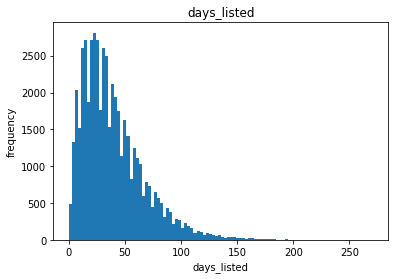

In [538]:
# Plotting the distribution of 'days_listed'

hist_plot(data, 'days_listed')

<AxesSubplot:>

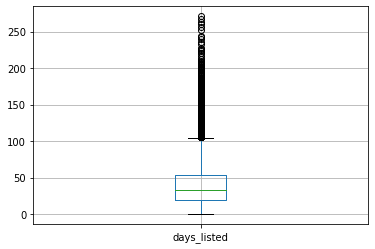

In [539]:
# Exploring the distribution of 'days_listed' with a boxplot

data.boxplot(column='days_listed')

There are significant outliers above the Q3 level skewing the mean to the higher end.
Let's explore these outliers further by slicing the data above the Q3 level.

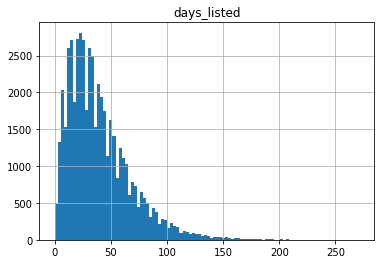

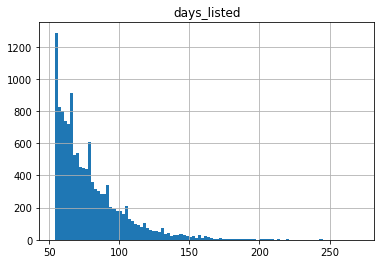

In [540]:
# Checking data with 'days_listed' above Q3

high_days_listed_data = data.query('days_listed > 53')

data.hist('days_listed', bins=100)
plt.show()

high_days_listed_data.hist('days_listed', bins=100)
plt.show()

The distribution of ads lifetime for days_listed longer than 53 days looks similar to the distribution of the entire data. Let's check the statistical distribution of the data of days_listed for a long time with data of ads posted less than 53 days to compare the distributions. Let's create a data slice with days_listed at or below 53 to compare it with the data of high_days_listed.

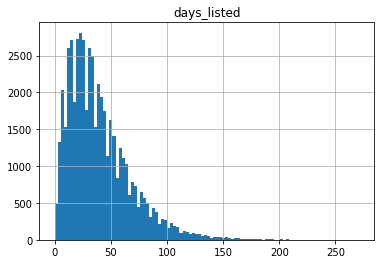

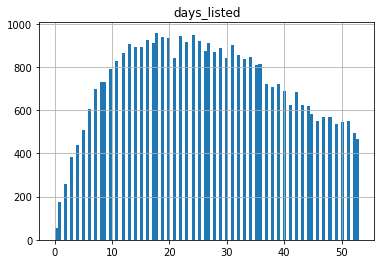

In [541]:
# Checking data with 'days_listed' at or below 53

low_days_listed_data = data.query('days_listed <= 53')

data.hist('days_listed', bins=100)
plt.show()

low_days_listed_data.hist('days_listed', bins=100)
plt.show()

When the data excludes the high end outliers there is a more normal distribution. Let's compare the means for condition and age for data and low_days_listed_data.

In [542]:
high_days_listed_data.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,model_year_new,odometer_new,year_posted,age,avg_mileage
count,12806.000000,12806.000000,12806.000000,12806.000000,12806.000000,12806.000000,12806.000000,12806.000000,12806.000000,12806.000000,12806.000000,12806.000000
mean,12133.614087,2009.790255,2.637982,6.134312,115452.593784,0.497735,78.782680,2009.790255,115452.681460,2018.313056,9.522802,115452.593784
std,9981.682935,6.092984,0.711246,1.663654,60752.770686,0.500014,24.294854,6.092984,60752.767164,0.463755,6.108436,60752.770686
min,1.000000,1955.000000,0.000000,3.000000,0.000000,0.000000,54.000000,1955.000000,0.000000,2018.000000,1.000000,0.000000
25%,4999.000000,2007.000000,2.000000,4.000000,73711.250000,0.000000,61.000000,2007.000000,73711.250000,2018.000000,5.000000,73711.250000
50%,9300.000000,2011.000000,3.000000,6.000000,114161.500000,0.000000,72.000000,2011.000000,114161.500000,2018.000000,8.000000,114161.500000
75%,16800.000000,2014.000000,3.000000,8.000000,151881.000000,1.000000,89.000000,2014.000000,151881.764877,2019.000000,13.000000,151881.000000
max,189000.000000,2019.000000,5.000000,10.000000,700047.000000,1.000000,271.000000,2019.000000,700047.000000,2019.000000,64.000000,700047.000000


In [543]:
low_days_listed_data.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,model_year_new,odometer_new,year_posted,age,avg_mileage
count,38718.000000,38718.000000,38718.000000,38718.000000,38718.000000,38718.000000,38718.000000,38718.000000,38718.000000,38718.000000,38718.000000,38718.000000
mean,12131.933287,2009.827160,2.637404,6.116638,115591.947415,0.495842,26.579601,2009.827160,115592.038160,2018.305620,9.478460,115591.947415
std,10060.494143,6.077415,0.712855,1.655393,62243.008672,0.499989,13.640057,6.077415,62243.005682,0.460676,6.091076,62243.008672
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1908.000000,0.000000,2018.000000,1.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,73500.000000,0.000000,15.000000,2007.000000,73500.000000,2018.000000,5.000000,73500.000000
50%,9000.000000,2011.000000,3.000000,6.000000,113649.000000,0.000000,26.000000,2011.000000,113649.000000,2018.000000,8.000000,113649.000000
75%,16860.750000,2014.000000,3.000000,8.000000,151881.000000,1.000000,37.000000,2014.000000,151881.764877,2019.000000,13.000000,151881.000000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,1.000000,53.000000,2019.000000,990000.000000,2019.000000,111.000000,990000.000000


Interestingly, the high_days_listed_data does not seem to vary significantly from the distribution of the entire data.  We might have expected that the ads remained longer because the vehicles were of poor quality. Yet, in both, the mean condition was 2.6 and the mean age was 8.5. Although a high price might caused the ad to remain londer, the mean for price was the same as well. It looks like removing the high end data does not signicantly affect the distribution.

A comparison of the data of ads with significantly higher days listed and ads with lower days listed does not show a reason for why the ads would remain listed for relatively more days.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I agree with you conclusions)
   

## Average price per each type of vehicle

Let's find the most popular type of vehicles listed. We will plot a graph showing the dependence of the number of ads on the vehicle type and select the two types with the greatest number of ads.

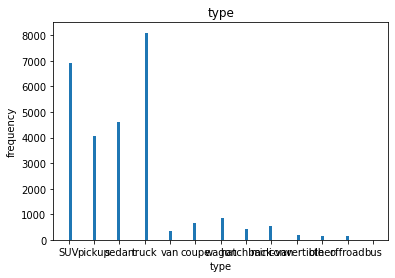

In [651]:
# Plotting the distribution of vehicle type

hist_plot(new_price_data,'type')

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

It's possible to rotate xtixks or increase the plot size.

Also, if we have more than 10 model types, it's incorrect to use 10 bins. Please, try to fix it)
    
    
On the other hand, brief suggests to study not model, but type of vehicles. It makes sense, cause you'll possibly get more data for each type. More data will increase the quolity of the next research) Please, try to change model into type here) 

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Thank you! I was looking at the list of fields in the intialization section of the project and there was an error. One field was 'transmission type' instead of 'transmission' and 'type'. The field 'type' was accidentally added to transmission. Since it read 'transmission type' and it was missing 'type' as a field, I didn't realize I could use type so I used model. After you pointed this out, I saw the error and fixed it. I appreciate it!
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1.</b> <a class="tocSkip"></a>

Thanks for your answer) Happy to help you)

In [652]:
# Identifying the most common vehicle types

new_price_data['type'].value_counts(normalize=True)

truck          0.299996
SUV            0.256082
sedan          0.170400
pickup         0.150924
wagon          0.031621
coupe          0.024438
mini-van       0.020513
hatchback      0.015033
van            0.013034
convertible    0.007072
other          0.005332
offroad        0.005258
bus            0.000296
Name: type, dtype: float64

The two most popular types are SUV (25.6%) and truck (29.9%).
Let's find the average price for each type. First, we will slice the data to extract the data for the SUV and truck.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

This plot is much better)

In [653]:
# Slicing to extract data for SUV

SUV_data = new_price_data[(new_price_data['type'] == 'SUV')]
SUV_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_new,odometer_new,year_posted,age,avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,2011.0,145000.000000,2018,8,145000
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,1,2019-01-07,68,2013.0,109473.000000,2019,7,109473
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,unknown,1,2018-07-16,19,2012.0,104174.000000,2018,7,104174
9,9200,2008,honda pilot,3,6,gas,147191,automatic,SUV,blue,1,2019-02-15,17,2008.0,147191.000000,2019,12,147191
14,12990,2009,gmc yukon,3,8,gas,132285,automatic,SUV,black,1,2019-01-31,24,2009.0,132285.000000,2019,11,132285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51494,7999,2009,chevrolet equinox,3,6,gas,95021,automatic,SUV,silver,1,2019-01-03,8,2009.0,95021.000000,2019,11,95021
51495,9500,2012,chevrolet traverse,2,6,gas,144500,automatic,SUV,unknown,1,2019-03-05,1,2012.0,144500.000000,2019,8,144500
51500,6995,2012,buick enclave,3,6,gas,157000,automatic,SUV,white,1,2018-08-04,17,2012.0,157000.000000,2018,7,157000
51502,7995,2011,chevrolet equinox,4,4,gas,111088,automatic,SUV,unknown,0,2019-04-01,175,2011.0,111088.000000,2019,9,111088


In [654]:
# Checking average price for SUV

SUV_data['price'].describe()

count      6916.000000
mean      11376.556246
std        5720.008554
min        5065.000000
25%        7075.000000
50%        9900.000000
75%       13995.000000
max      123456.000000
Name: price, dtype: float64

The average price for an SUV is 11376.

In [655]:
# Slicing to extract data for truck

truck_data = new_price_data[(new_price_data['type'] == 'truck')]
truck_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_new,odometer_new,year_posted,age,avg_mileage
22,7500,2004,chevrolet silverado,4,8,gas,180000,automatic,truck,red,1,2019-01-05,64,2004.0,180000.000000,2019,16,180000
39,8000,2009,ford f-150,2,8,gas,234000,automatic,truck,black,1,2019-03-31,1,2009.0,234000.000000,2019,11,234000
53,10400,2012,chevrolet colorado,3,5,gas,111871,automatic,truck,red,1,2019-01-30,27,2012.0,111871.000000,2019,8,111871
60,13000,2005,ram 1500,2,8,gas,146000,automatic,truck,grey,1,2019-03-14,26,2005.0,146000.000000,2019,15,146000
61,16999,2013,chevrolet silverado 1500,2,8,gas,137230,automatic,truck,white,1,2018-05-29,24,2013.0,137230.000000,2018,6,137230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51467,38995,2014,ram 2500,3,6,diesel,111623,automatic,truck,white,1,2018-05-03,64,2014.0,111623.000000,2018,5,111623
51470,22000,2004,ram 1500,4,8,gas,158872,automatic,truck,silver,0,2019-03-22,33,2004.0,158872.435047,2019,16,158872
51482,13900,2006,chevrolet silverado 1500,3,8,gas,152000,automatic,truck,unknown,1,2018-05-08,33,2006.0,152000.000000,2018,13,152000
51488,21900,2012,chevrolet silverado 3500hd,3,8,diesel,203000,automatic,truck,white,1,2018-12-27,37,2012.0,203000.000000,2018,7,203000


In [656]:
# Checking average price for truck

truck_data['price'].describe()

count      8102.000000
mean      16107.982720
std       10064.493318
min        5100.000000
25%        9950.000000
50%       14900.000000
75%       19995.000000
max      300000.000000
Name: price, dtype: float64

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

This part is pretty good except that issue with types and models. I'm sure this will be easy for you to fix)

## Price factors

Using the most popular types of vehicles listed in the advertisements we will study whether the price depends on age, mileage, condition, transmission type, and color. This will allow us to analyze what factors impact the price of a car most.
We will correlate price and each of the parameters for the SUV and truck separately.

<AxesSubplot:>

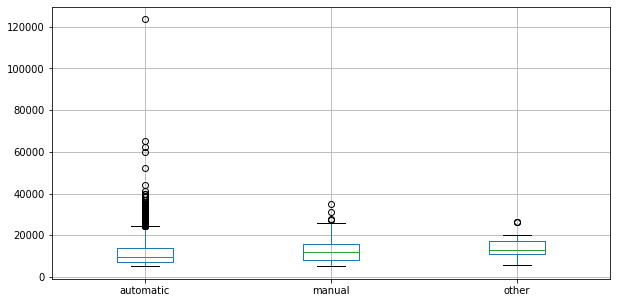

In [550]:
#Plotting SUV price based on transmission using a boxplot

SUV_data.pivot(values='price', columns='transmission').boxplot(figsize=(10,5))

The medians and distributions are similar across transmission types. There was no correlation between price and transmission type for SUVs.

<AxesSubplot:>

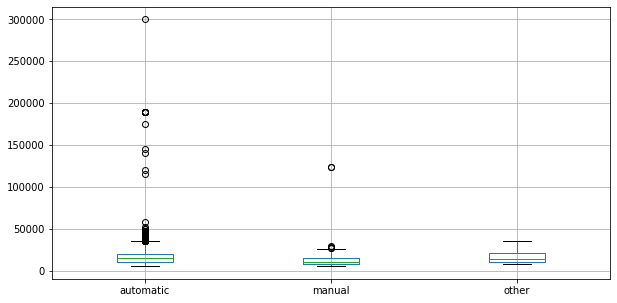

In [551]:
#Plotting truck price based on transmission type using a boxplot

truck_data.pivot(values='price', columns='transmission').boxplot(figsize=(10,5))

The medians and distributions are similar. There is no correlation between price and transmission for trucks.

<AxesSubplot:>

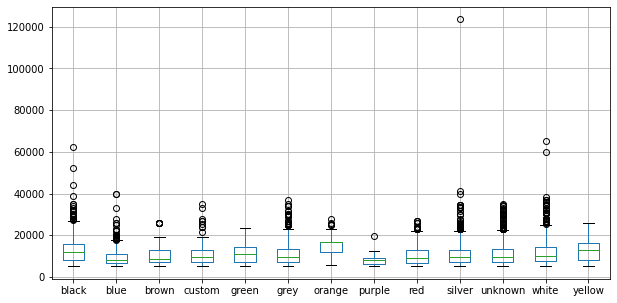

In [448]:
# Plotting SUV price based on paint color using box-and-whisker chart

SUV_data.pivot(values='price', columns='paint_color').boxplot(figsize=(10,5))

The SUV price was partially correlated with paint color such that orange was correlated with a higher price.

<AxesSubplot:>

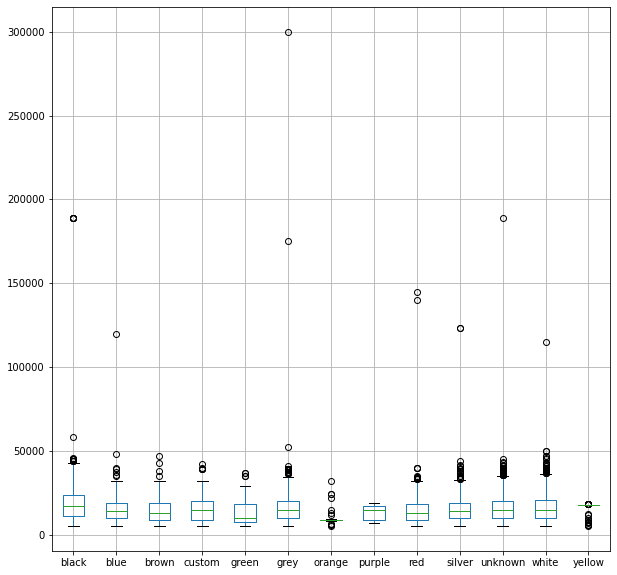

In [450]:
# Plotting truck price based on paint color using box-and-whisker chart

truck_data.pivot(values='price', columns='paint_color').boxplot(figsize=(10,10))

<AxesSubplot:>

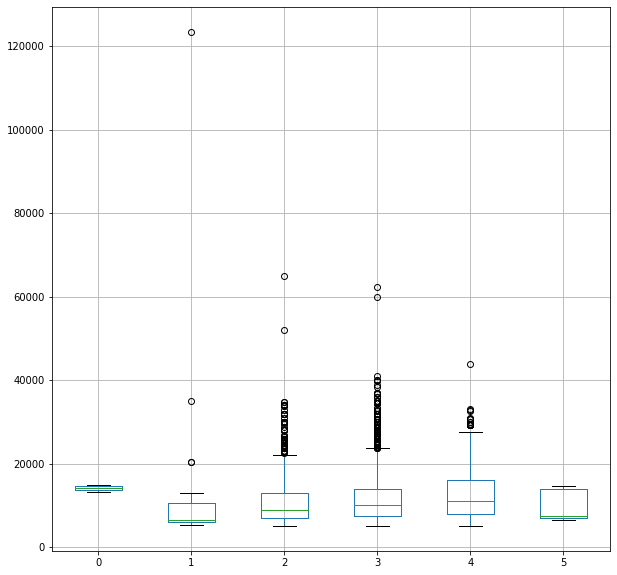

In [456]:
# Plotting SUV price based on condition using box-and-whisker chart

SUV_data.pivot(values='price', columns='condition').boxplot(figsize=(10,10))

The 0 ("salvage") condition has a higher median than the 5 ("new") condition. Obvioulsy, SUV price was not correlated with condition.

<AxesSubplot:>

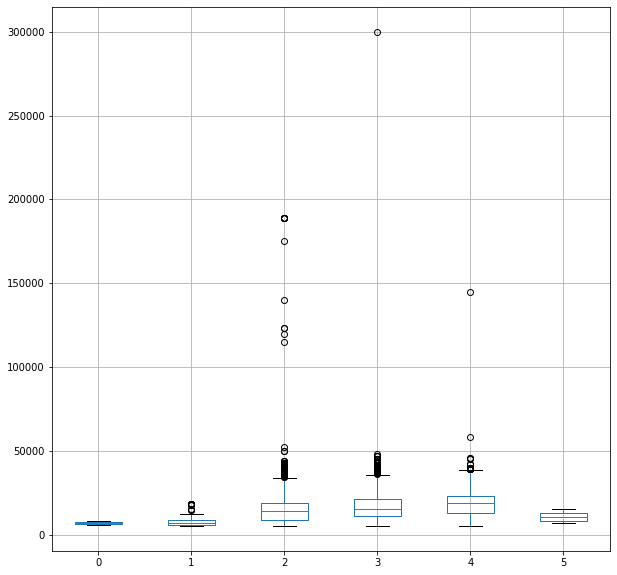

In [455]:
# Plotting truck price based on condition using box-and-whisker chart

truck_data.pivot(values='price', columns='condition').boxplot(figsize=(10,10))

The truck price was not correlated with condition.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Your boxplots are really good! 

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well, it's also good to use boxplots for condition) Condition includes only numbers, but we now that they mean category here)

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I agree. I noticed that the project guidelines said to use boxplots for transmission and paint color and scatterplots for every other parameter, so this included condition. That's why I used a scatterplot. I changed condition to a boxplot.

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1.</b> <a class="tocSkip"></a>

I think it looks better now) More informative and easy to undestand)

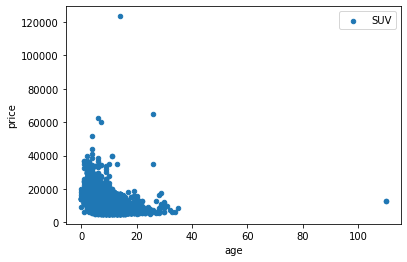

In [457]:
# Plotting SUV price based on age using a scatterplot
#df.plot.scatter(x='col1', y='col2',label = 'label')
#plt.legend()
#plt.show()

SUV_data.plot.scatter(x='age', y='price',label = 'SUV')
plt.legend()
plt.show()

SUV price looks slightly negatively correlated with age based on this scatterplot. We need to check the statistical correlations for a more accurate measure of correlation.

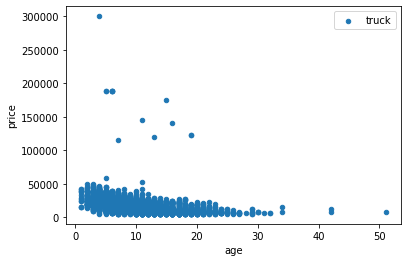

In [553]:
# Plotting truck price based on age using a scatterplot

truck_data.plot.scatter(x='age', y='price',label = 'truck')
plt.legend()
plt.show()

Truck price was not correlated with age.

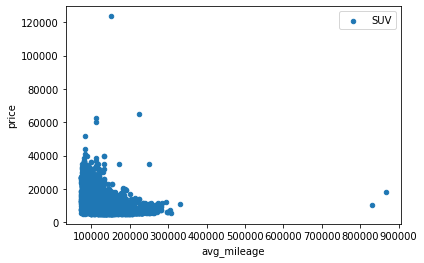

In [554]:
# Plotting SUV price based on mileage using a scatterplot

SUV_data.plot.scatter(x='avg_mileage', y='price',label = 'SUV')
plt.legend()
plt.show()

SUV price was slightly negatively correlated with mileage. We need to check the statistical correlations for a more accurate measure of correlation.

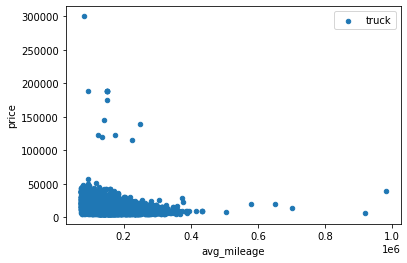

In [555]:
# Plotting truck price based on mileage using a scatterplot

truck_data.plot.scatter(x='avg_mileage', y='price',label = 'truck')
plt.legend()
plt.show()

Let's calculate the correlation of price with all of the numeric parameters using a correlation matrix for both SUVs and trucks. First we will create a separate dataframe for the SUV_data and the truck_data to use for a correlation matrix.

In [657]:
# Creating a dataframe for ford parameters based on new_price_data including price, age, and avg_mileage
SUV_corr_data = pd.DataFrame().assign(price=SUV_data['price'], age=SUV_data['age'], mileage=SUV_data['avg_mileage'])
SUV_corr_data.corr()

,price,age,mileage
price,1.000000,-0.369150,-0.371004
age,-0.369150,1.000000,0.356638
mileage,-0.371004,0.356638,1.000000


For the SUV, price is not significantly correlated with age or mileage.

In [658]:
# Creating a dataframe for truck parameters based on new_price_data including price, age, and odometer
truck_corr_data = pd.DataFrame().assign(price=truck_data['price'], age=truck_data['age'], mileage=truck_data['avg_mileage'])
truck_corr_data.corr()

,price,age,mileage
price,1.000000,-0.434286,-0.281786
age,-0.434286,1.000000,0.399105
mileage,-0.281786,0.399105,1.000000


For trucks, price is not correlated with mileage and age.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct interpretation of corr matrices!

## General conclusion

We explored data from free advertisements published on the Crankshaft List to determine which factors influence the price of a vehicle.

Before our exploratory analysis, we preprocessed the data to address any issues with missing values, duplicates, data type, and perform exploratory data analysis to selectively slice the data.

This would allow us to analyze what factors impact the price of a car most. We aimed to identify the most popular types of vehicles listed in the advertisements and study whether the price depends on age, mileage, condition, transmission type, and color.

The data contained 51525 ads with data on 12 variables, including price, model year, model, condition, cylinders, fuel, odometer, transmission type, paint color, wehter the vehicle has 4-wheel drive, the date the ad was published, and the days it was listed from publication to removal.
There were several columns with inappropriate data types. The columns 'model_year', 'cylinders', 'odometer' and 'is_4wd' were float types, yet they should have been integers. Also, 'date_posted' was a string, yet it should have been a datetime type. Also, the 'condition' column was a string categorical variable which needed to be converted to an integer based on a categorical scale to enable further analysis.

There were missing values in the 'model_year', 'cylinders', 'odometer', paint_color', and 'is_4wd' columns. More than half of the data in 'is_4wd' had missing values.

Before we converted several columns to new data types, we addressed the missing values in some columns. The majority of the values in 'is_4wd' were missing. This may have been the result of a technical or programming error. Since the data in this column is similar to a Boolean value, where 1.0 is true if there is four-wheel drive and 0.0 is false if there is no four-wheel drive, it is possible that the missing values in that column represent 0.0 values. We, therefore, replaced the NaN values with 0.

We then calculated the percentage of missing values in each of the columns with missing values to help us determine how to fill the missing values.

There were 7% missing values in 'model_year', 10% missing in 'cylinders', 15% in 'odometer', and 18% in 'paint_color'. We sliced the dataframe to create a slice with only missing values so we can see if the rows where there are missing values in these columns overlap one another to check if there is a relationship between the missing values in these columns. We also checked the distribution in the missing values data sample compared to the distribution of the entire data sample.

There were 21609 rows containing missing values. There was no clear relationship among the columns with missing values. Some rows contained missing values in more than one column, others had missing values in only one column. The missing values represented 42% of the data. There are many possible reasons for missing values in the data. Some reasons for the missing values might be: Seller forgot to fill in a field. There might have been a technical or programming error. We decided to fill in the missing values.

We replaced the missing values in ‘paint_color’ with the category 'unknown'. We then compared the distributions of the data with missing values and the entire data to see how we can fill in the missing values in 'cylinders', 'model_year' and 'odometer'. The distributions of the data with missing values was very similar to the distribution of the entire data. We, therefore chose to use a median or a mean of the data to fill in the missing values.

We filled in the missing values in cylinders with the median of cylinders grouped per model. We converted the condition column to a numeric scale ranging from 0-5 (0 being worst and 5 being best) to enable further analysis. We used the median of 'model_year' grouped by 'condition' to replace missing values in 'model_year.' We then calculated the average mileage per year and filled in the missing values in 'odometer' using the means of 'odometer' grouped by 'model_year'. We were unable to replace the missing value in ‘odometer’ for the ‘model_year’ 1929 because it has only one value so there was no mean. We therefore dropped the row containing 1929 for model_year.

We fixed the data types by converting 'model_year', 'condition','cylinders', 'odometer', and 'is_4wd' into integer types.  We checked for duplicates and there were no duplicates in the data. We converted 'date_posted' to a datetime value.

In order to calculate the vehicle's age when the ad was placed, we extracted the year from 'date_posted' and assigned it to a new column 'year_posted'. We created a function to subtract the model_year from the year_posted to determine the vehicle’s age and saved this data to the ‘age’ column.

After the data was preprocessed, we explored condition, age, cyclinders, mileage, and price by plotting histograms for each parameter.

For condition, the majority of vehicles were within the condition of 3 (excellent, 48%) and 2 (good, 39%), with very few ranked as 5 (new, 0.3%) or 0 (salvage, 0.2%).

A majority of vehicles were in the lower age range of 0-10 years. Yet there are outliers that are significantly older. The distibution of ages of vehicle had a range from 0 to 110. The median was 7.0 but the mean was 8.5. Significantly higher values were skewing the distribution and raising the mean for age. After plotting a box plot and exploring these higher values by slicing data above the Q3 level, we found that the distribution of ages above Q3 looks like the normal higher end distribution of a bell curve. The data has a wide range but the majority of the ages was consistent with what we would expect. The median age was 7. The higher values for age looked like a normal feature of the data. We would expect older vehicles to be listed on a user car website. The top ten ages of vehicles range from 2-11 years. This makes sense since 87% of vehicles were listed as in "good" or "excellent" condition. We would have expected the cars to be between mostly 5-10 years in age.

The number of cylinders ranged from 3-12. The median was 6 and the mean was 6.1. The distribution looks normal. The majority of vehicles had 8 (34%), 6 (34%), or 4 (30%) cylinders.

There was a high number of vehicles with low mileage readings. This is surprising for a used car website, especially when the majority of vehicles are listed in 'good' to 'excellent' but not 'new' condition. We checked the distribution of 'odometer' for outliers using describe() and a boxplot. We explored the data of age of vehicles at the two extremes. We sliced the data of vehicles above the Q3 level and below the Q1 level and compared the distribution of these data slices with the entire data. We also looked at the value counts to investigate where the high counts in the high odometer levels were coming from. The distribution of odometer values above the Q3 level seems like a normal distribution. Below the Q1 level, on the other hand, there were mostly higher values, yet there were four spikes of unusually popular odometer levels below the 25% level. We explored this data slice of low odometer levels to understand these spikes and look at the value counts to investigate where the high counts are coming from. The spikes were from the four most common odometer readings are: 61455, 47557, 25463, and 0. The top three readings are very specific readings and there is a low probability that these odometer readings were genuinely the most common in the ads. It is possible that these odomoter values were generated by a technical error or a programming error. We also grouped odometer by condition for the slice of odometer below Q1 to see if the values make sense. We found only two vehicles listed as "new" (condition 0) with a 0 value. This implied that the remaining 183 values of 0 are inaccurate. A car listed as something other than "new" cannot have 0 mileage. We calculated the percentage of the data in the slice of data below Q1. These peculiar odometer values represented 2.6% of the entire data. We, therefore, excluded these values from further analysis by slicing the data above the Q1 level.

We explored price distribution and found that the median of 'price' was surprisingly low, near zero. At the other end, there were many outliers on the higher end of the price distribution. We sliced the price data at the Q3 and Q1 levels to explore the slices of data containing the two extremes. The distribution of prices above the Q3 level seemed like a normal distribution. Yet, within the data sliced below Q1, there was a surprisingly high value of cars priced at 1. This seemed like an inaccuracy due to a technical or processing error. We graphed prices by condition for low_price_data to explore these values further.

There were prices abnormally distributed based on condition. We would have expected to find higher prices at the condition_rank level of 5 ("new") and lower prices at condition level of 0 ("salvage"). Yet, there were low and high values throughout both of these columns. The data in low_price_data was therefore faulty so we exclude it from further analysis. This excluded 25% of our data.
We then explored how many days advertisements were displayed (days_listed) to describe the typical lifetime of an ad and determine when ads were removed quickly or listed for an abnormally long time. The typical lifetime of an ad shows a mean of 39 days, and a median of 33 days. The range is between 0 and 271. We sliced the data for ‘days_listed’ above the Q3  to compare its distribution with the data below the Q3 level. Interestingly, the high_days_listed_data did not vary significantly from the distribution of the rest of the data. We might have expected that the ads remained longer because the vehicles were of poor quality. Yet, in both, the mean condition was 2.6 and the mean age was 8.5. Although a high price might caused the ad to remain londer, the mean for price was the same as well. A comparison of the data of ads with significantly higher days listed and ads with lower days listed does not show a reasons for why the ads would remain listed for relatively more days. Since removing the high end data did not signicantly affect the distribution, we did not exclude any data based on days_listed.

We found the average price for the two most popular types of vehicles listed on the site: The average price for an SUV is 11376. The average price for a truck is 16107.

We then explored the correlation between price and various parameters for each of these popular vehicles. We plotted box and whisker charts to explore the correlation between price and transmission, paint color, and condition. We also plotted scatterplots to explore the correlations between price and age, and mileage.

The SUV price was partially correlated with paint color such that orange was correlated with a higher price. For trucks, there was a fairly even distribution of prices across colors. The truck price was not correlated with price color.

SUV price and truck price were not correlated with condition, age or mileage.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I'm really impressed with your conclusion!

It's a really great work!

<b>Overall reviewer's comment</b> <a class="tocSkip"></a>
    
Thank you for sending your project. Your project is really good!

I especially liked your work with pandas, correlations and different plot types!)

And the final conclusion is also really good)
        
<span class="text-danger">
    
However, I cann't accept it this time. 
    
Please, pay attention to the data preparation part) Look through my yellow comments - hope they will help you)

Also, I recommend you to change the part 1.11 (type or model).
    
</span>

<span class="text-success"> 
    
    
Hope I managed to help you)
    

    
Good luck!

One more time and you'll have it!

🍀
</div>

<b>Overall reviewer's comment v.1.</b> <a class="tocSkip"></a>
    
Hello!

Thanks for your corrections and answers) It's great to get answers and feedback)

As for your project, I checked all of your corrections, and your project is perfect now!

I'm glad to say that your project has passed review!

Congratulations and good luck on the next sprint!

&#127881;
&#127881;
&#127881;
